In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df1=pd.read_csv('C://Users/ayanb/Desktop/datatrained Projects/Mushroom Project/mushrooms.csv')
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df1.shape

(8124, 23)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

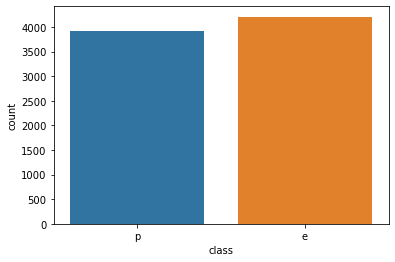

In [7]:
d_class=df1['class']
sns.countplot(d_class)

From above we can see that we have more edible classified mushrooms than poisonus classified mushrooms.

In [7]:
#checking for null values
df1.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The mushrooms table has  8124 rows and 23 coloumns.Also there are no null values in the Mushrooms data set.

<Figure size 1008x432 with 0 Axes>

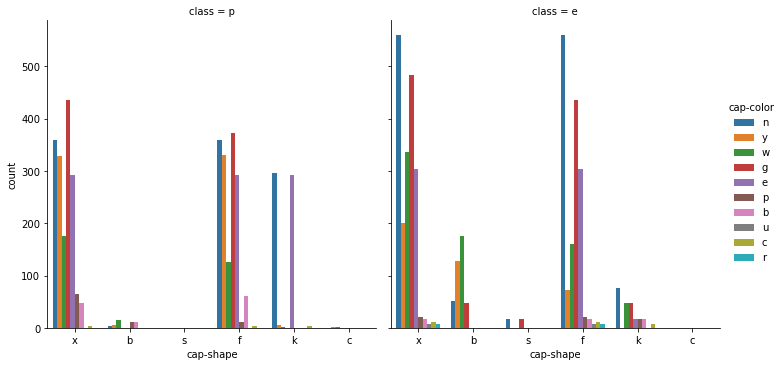

In [15]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=df1,kind='count')

Analysis from above graphs.

1.White, yellow coloured and bell shaped mushrooms are highly recommended for eating. 
2.Knobbed shaped brown and red mushrooms are the most poisonus.


<Figure size 1008x432 with 0 Axes>

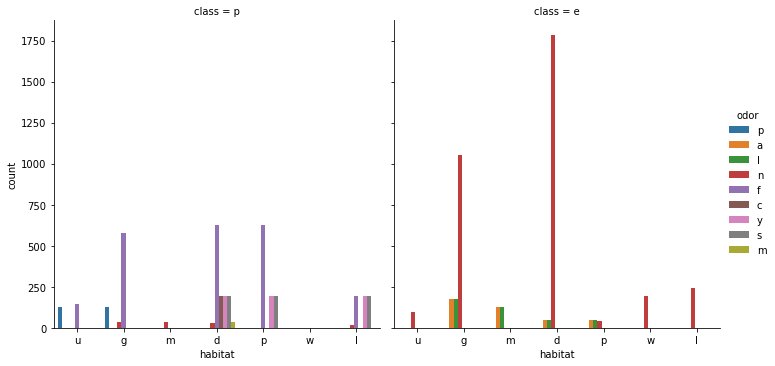

In [10]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='habitat',hue='odor',col='class',data=df1,kind='count')

From above 2 graphs we can conclude:
1.Most of the poisonus mushrooms are foul smell in almost every habitat
2.Most of the edible mushrooms have no smell in almost every habitat.

<Figure size 1008x432 with 0 Axes>

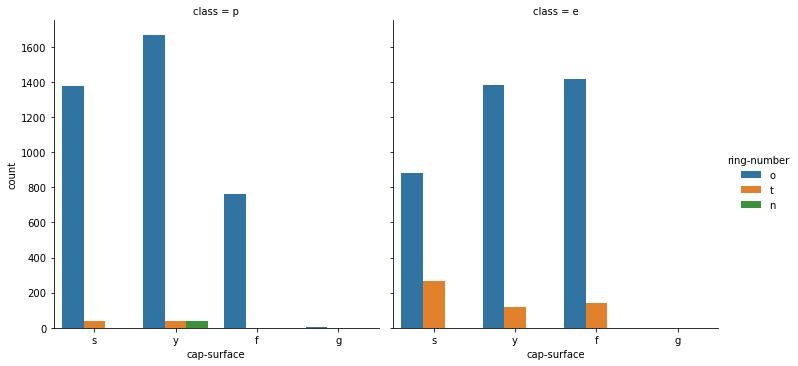

In [5]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='cap-surface',hue='ring-number',col='class',data=df1,kind='count')

most of mushrooms poisonus or edible have ring-number one
all fibrous cap surface with ring 2 are edible

<AxesSubplot:xlabel='class', ylabel='habitat'>

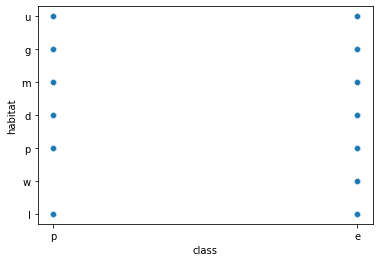

In [12]:
sns.scatterplot(x='class',y='habitat',data=df1)


As we can see in the above plot , poisonus mushrooms are not found in waste land areas.

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df1.apply(le.fit_transform)
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
#dropping class coloumn from dataframe and assigning to y
x=df1.drop(['class'],axis=1)
y=df1['class']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# Classification Models

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
# Decision Tree Classification

dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
dt1.score(x_train,y_train)
predt1=dt1.predict(x_test)
print(accuracy_score(y_test,predt1))
print(confusion_matrix(y_test,predt1))
print(classification_report(y_test,predt1))


1.0
[[1272    0]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [9]:
# K Neighbours
kdt1=KNeighborsClassifier(n_neighbors=5)
kdt1.fit(x_train,y_train)
kdt1.score(x_train,y_train)
predkdt1=kdt1.predict(x_test)
print(accuracy_score(y_test,predkdt1))
print(confusion_matrix(y_test,predkdt1))
print(classification_report(y_test,predkdt1))


0.9979491386382281
[[1267    5]
 [   0 1166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Support Vector Classifier Model (Kernel =poly and rbf)

In [10]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))



0.9897456931911403
[[1270    2]
 [  23 1143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1272
           1       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [11]:
svc1=SVC(kernel='poly')
svc1.fit(x_train,y_train)
svc1.score(x_train,y_train)
predsvc1=svc1.predict(x_test)
print(accuracy_score(y_test,predsvc1))
print(confusion_matrix(y_test,predsvc1))
print(classification_report(y_test,predsvc1))

0.9975389663658737
[[1272    0]
 [   6 1160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      0.99      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [12]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8076292042657917
[[1185   87]
 [ 382  784]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1272
           1       0.90      0.67      0.77      1166

    accuracy                           0.81      2438
   macro avg       0.83      0.80      0.80      2438
weighted avg       0.83      0.81      0.80      2438



# Accuracy Score Generated from Different Models

Multinomial NaiveBias:0.8076
Support vector machine polynomial kernel:0.9975
Support vector machine rbf kernel:0.9897
KNeighbourClassifier:0.9979
DecisionTreeClassifier:1.0000

Now checking for cross validation for all the models

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
print(cross_val_score(mnb,x,y,cv=5).mean())

0.7267300492610838


In [15]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.841292231906025


In [16]:
print(cross_val_score(svc1,x,y,cv=5).mean())

0.8486774535809019


In [18]:
print(cross_val_score(kdt1,x,y,cv=5).mean())

0.8815549071618036


In [22]:
print(cross_val_score(dt1,x,y,cv=5).mean())

0.9211919666540357


Difference
multinomial NB:0.8076-0.7267=0.0809
SVM poly:0.9975-0.8486=0.1489
SVM:0.9897-0.8486=0.1411
KN:0.9979-0.8815=0.1164
DT:1-0.9128=0.0872

The least difference is in multinomial DB.So its the best model .




NameError: name 'bn' is not defined

ValueError: Parameter grid for parameter (fit_prior) needs to be a list or numpy array, but got (<class 'str'>). Single values need to be wrapped in a list with one element.